In [ ]:
# Exercício 9 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9559342265129089, 9.094798557205826e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/NinthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0  0.295410  1.151799 -1.734433
1  3.867399  2.357983 -5.357665
2  3.307760  1.905340 -5.600114
3  2.775161  1.466775 -5.814948
4  2.282239  1.048865 -5.989264


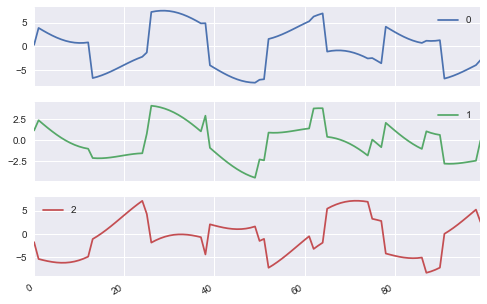

In [24]:
distDataFrame.T.plot(subplots = True)
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.252,0.9504,0.00088605
1,0,0.2069,0.9766,0.071963
2,0,0.1104,0.9555,0.001951


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.0260009765625 seconds


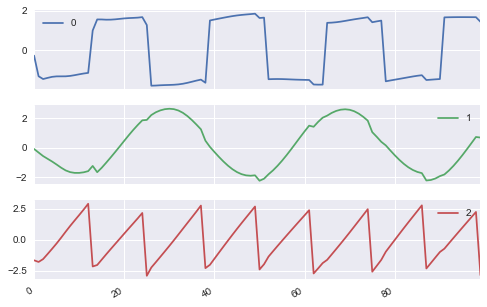

In [7]:
pd.DataFrame(yNPCA.T).plot(subplots = True)
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3046,1.0166,0.7271,2.429e-12
1,0,0.5697,0.9076,3.2886e-06
2,0,0.0859,0.961,0.0047732


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


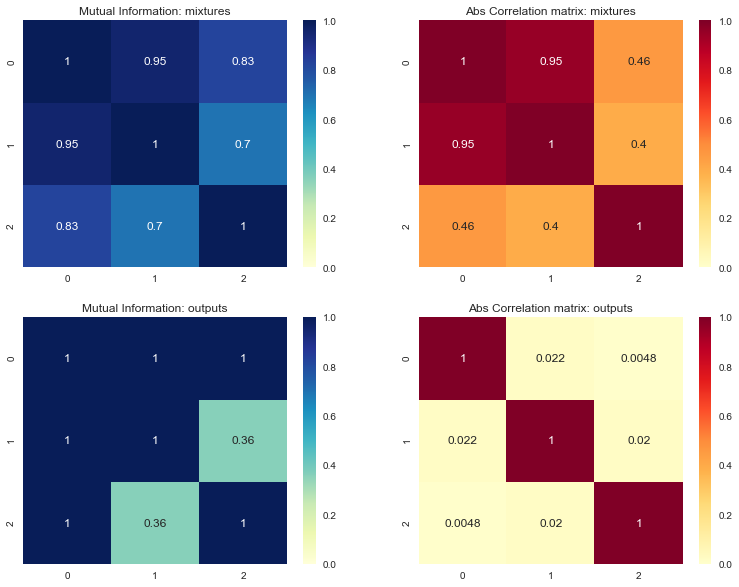

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-5, decayRate = 1e-5, runs  = 1) 

Execution time: 0.01400303840637207 seconds


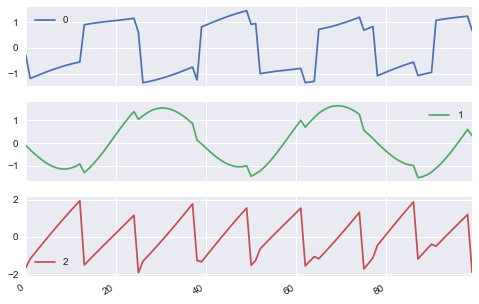

In [10]:
pd.DataFrame(yFeedback.T).plot(subplots = True)
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2198,1.1896,0.8101,5.1023e-10
1,0,0.3882,0.9102,4.4181e-06
2,0,0.2553,0.9723,0.033399


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


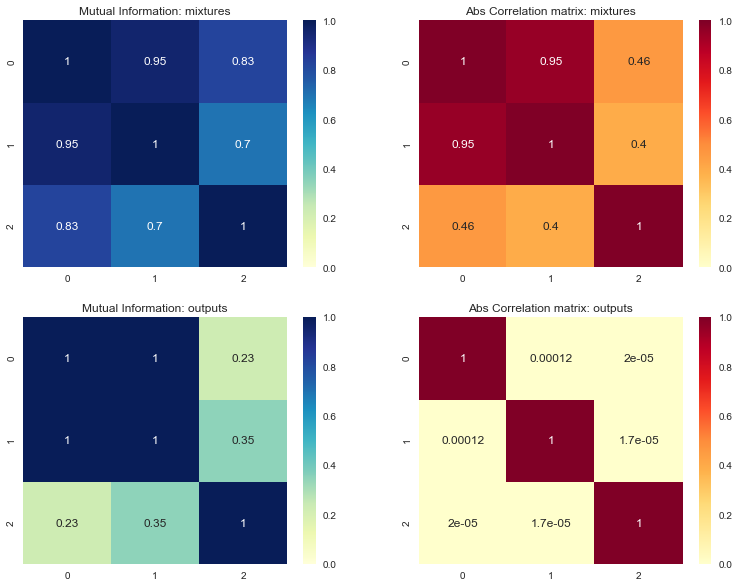

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.010999441146850586 seconds


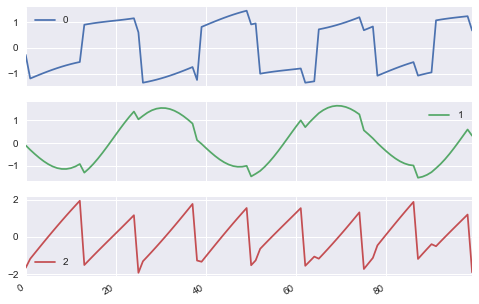

In [13]:
pd.DataFrame(yFeedforward.T).plot(subplots = True)
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1424,1.3159,0.8101,5.1134e-10
1,0,0.4075,0.9102,4.4069e-06
2,0,0.0462,0.9723,0.033435


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


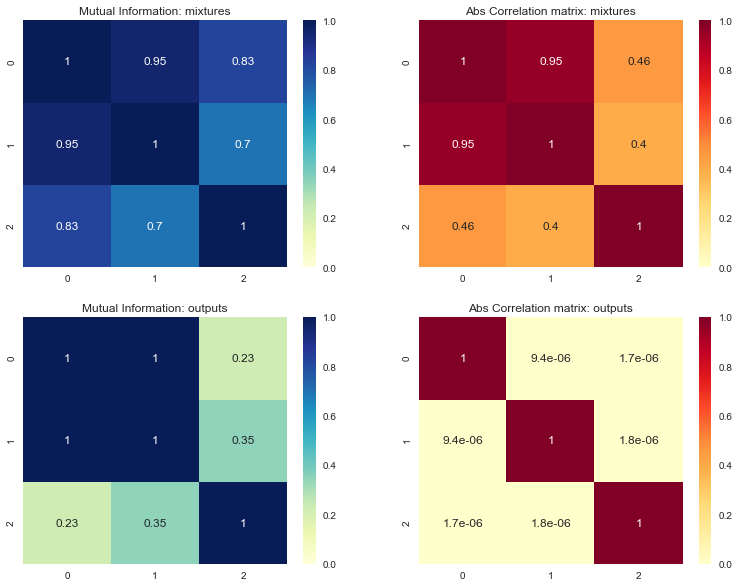

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Fontes conhecidas

In [15]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/NinthSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 100)


,0,1,2
0,0.295410,1.151799,-1.734433
1,3.867399,2.357983,-5.357665
2,3.307760,1.905340,-5.600114
3,2.775161,1.466775,-5.814948
4,2.282239,1.048865,-5.989264


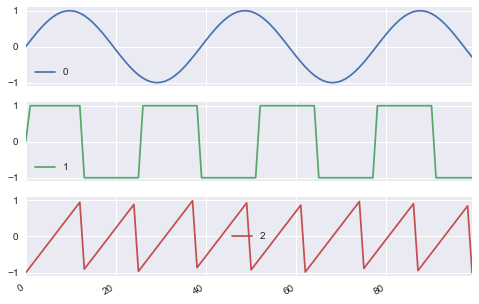

In [16]:
distDataFrameSources.T.plot(subplots = True)
plt.show()

In [21]:
def coheMatrix(sources, estimations):
    from scipy.signal import coherence

    fig, axs = plt.subplots(3,3)

    S1 = sources[0]
    S2 = sources[1]
    S3 = sources[2]

    x1 = coherence(S1, estimations[0], fs = 44100)
    x2 = coherence(S1, estimations[1], fs = 44100)
    x3 = coherence(S1, estimations[2], fs = 44100)


    axs[0, 0].plot(x1[0], x1[1])
    axs[1, 0].plot(x2[0], x2[1])
    axs[2, 0].plot(x3[0], x3[1])
    axs[0, 0].set_title('S0')

    y1 = coherence(S2, estimations[0], fs = 44100)
    y2 = coherence(S2, estimations[1], fs = 44100)
    y3 = coherence(S2, estimations[2], fs = 44100)

    axs[0, 1].plot(y1[0], y1[1])
    axs[1, 1].plot(y2[0], y2[1])
    axs[2, 1].plot(y3[0], y3[1])
    axs[0, 1].set_title('S1')

    z1 = coherence(S3, estimations[0], fs = 44100)
    z2 = coherence(S3, estimations[1], fs = 44100)
    z3 = coherence(S3, estimations[2], fs = 44100)

    axs[0, 2].plot(z1[0], z1[1])
    axs[1, 2].plot(z2[0], z2[1])
    axs[2, 2].plot(z3[0], z3[1])
    axs[0, 2].set_title('S2')

    plt.tight_layout()
    plt.show()
    
    return None

## NPCA-RLS

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


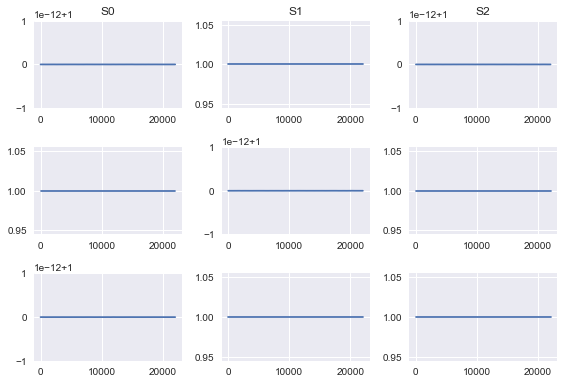

In [22]:
coheMatrix(distDataFrameSources.values, yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


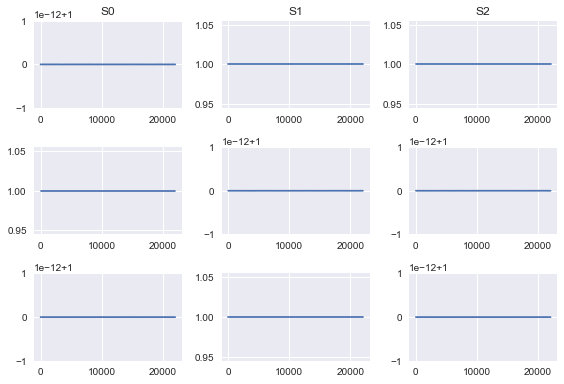

In [26]:
coheMatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


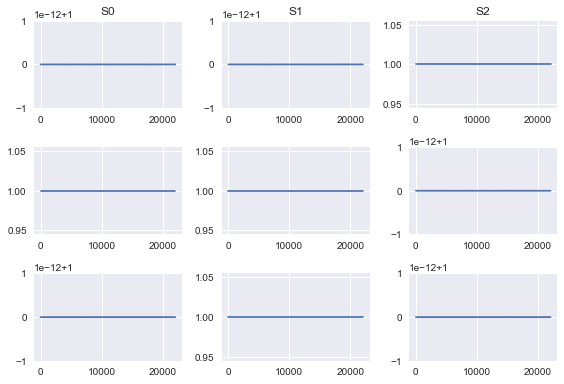

In [27]:
coheMatrix(distDataFrameSources.values,yFeedforward)